In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
from numpy.random import seed
from numpy.random import randn
from numpy import exp
from scipy.stats import boxcox

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_regression, mutual_info_classif, f_regression
from sklearn.metrics import accuracy_score, log_loss
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, PassiveAggressiveRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [113]:
train_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/test.csv')
test_dataY = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/sample_submission.csv')


In [114]:
train_data.drop(['Id','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)
test_data.drop(['Id','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [115]:
def fill_null(data):
  for i in data:
    if data[i].dtype == object:
      mode = data[i].mode()
      data[i].fillna(mode[0], inplace = True)
    else:
      mode = data[i].mode()
      data[i].fillna(mode[0], inplace = True)
  return data
train_data= fill_null(train_data)
test_data = fill_null(test_data)

In [116]:
train_data.loc[train_data['Exterior1st'] == train_data['Exterior2nd'],'Exterior'] = 1
train_data.loc[train_data['Exterior1st'] != train_data['Exterior2nd'],'Exterior'] = 2
train_data.loc[train_data['Condition1'] == train_data['Condition2'],'Condition'] = 1
train_data.loc[train_data['Condition1'] != train_data['Condition2'],'Condition'] = 2
train_data = train_data.drop(['Exterior1st','Exterior2nd','Condition1','Condition2'],axis = 1)

test_data.loc[test_data['Exterior1st'] == test_data['Exterior2nd'],'Exterior'] = 1
test_data.loc[test_data['Exterior1st'] != test_data['Exterior2nd'],'Exterior'] = 2
test_data.loc[test_data['Condition1'] == test_data['Condition2'],'Condition'] = 1
test_data.loc[test_data['Condition1'] != test_data['Condition2'],'Condition'] = 2
test_data = test_data.drop(['Exterior1st','Exterior2nd','Condition1','Condition2'],axis = 1)

In [118]:
train_x = train_data.filter(cols,axis = 1)
test_x = test_data.filter(cols,axis = 1)

In [119]:
train_x['FloorSf'] = train_data['1stFlrSF']+train_data['2ndFlrSF']
train_x['GarageArea1'] = train_x['GarageArea']*train_x['GarageCars']
train_x['TotRmsAbvGrd'] = train_x['TotRmsAbvGrd']+train_data['GrLivArea'] + train_x['FloorSf']
train_x['YearBuilt'] = (train_x['YearBuilt'] + train_data['GarageYrBlt'] + train_x['YearRemodAdd'])
train_x = train_x.drop(['GarageArea','GarageCars','1stFlrSF','GrLivArea','FloorSf','GarageYrBlt','YearRemodAdd'],axis = 1)

In [144]:
test_x['FloorSf'] = test_x['1stFlrSF']+train_data['2ndFlrSF']
test_x['GarageArea1'] = test_x['GarageArea']*test_x['GarageCars']
test_x['TotRmsAbvGrd'] = test_x['TotRmsAbvGrd']+test_x['GrLivArea'] + test_x['FloorSf']
test_x['YearBuilt'] = (test_x['YearBuilt'] + test_x['GarageYrBlt'] + test_x['YearRemodAdd'])
test_x = test_x.drop(['GarageArea','GarageCars','1stFlrSF','GrLivArea','FloorSf','GarageYrBlt','YearRemodAdd'],axis = 1)

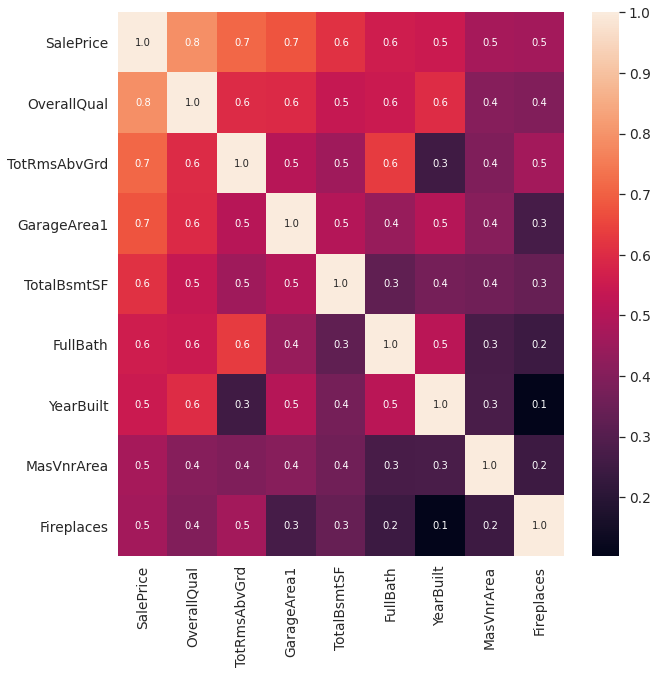

In [146]:
f,ax = plt.subplots(figsize=(10, 10))
corrmat = train_x.corr()
k =14
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_x[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=False, fmt='.1f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [208]:
test_x.shape

(1459, 8)

In [223]:
y = np.log(train_x['SalePrice'])
train = train_x.drop(['SalePrice'],axis = 1)

In [ ]:
#train = np.log(train)
#train
#np.log(2)
for i in train:
  a = np.array(train[i])
  a1 = np.array(test_x[i])
  b = []
  b1 = []
  for j in a:
    if j != 0 and j!= 1:
      b.append(np.log(j))
    else:
      b.append(j)
  for j in a1:
    if j != 0 and j!= 1:
      b1.append(np.log(j))
    else:
      b1.append(j)
  train[i] = b
  test_x[i] = b1
train

In [227]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

In [228]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
res = regressor.score(X_train, y_train)
print(res*100)
y_pred = regressor.predict(X_test)
a = mean_squared_error(y_test, y_pred)
rmse = a
rmse
# 34 features
#81.11211900041317
#32908.83108668875

# 25 features
80.0038442074204
32692.370436137197

81.0540685950816


32692.370436137197

In [229]:
passref = PassiveAggressiveRegressor(max_iter=1000000,early_stopping=False,n_iter_no_change=1000,shuffle=True,)
passref.fit(X_train, y_train)
res = passref.score(X_train, y_train)
print(res*100)
y_pred = passref.predict(X_test)
a = mean_squared_error(y_test, y_pred)
rmse = a
rmse

69.0547807719173


0.04236983901375782

In [230]:
pred_y = passref.predict(test_x)

In [232]:
pred_y = np.exp(pred_y)

In [233]:
pred_y

array([140771.27790067, 178056.21780793, 177645.49862959, ...,
       154267.06197311, 111578.47280407, 251352.42922272])

In [234]:
pred_y = pred_y.reshape(-1)
all_id = np.array(test_dataY['Id'])
y_pred = pd.DataFrame(list(zip(all_id, pred_y)),columns =['Id', 'SalePrice'])
y_pred.to_csv("/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/log.csv", index=False)

Train: 0.242, Test: 0.251


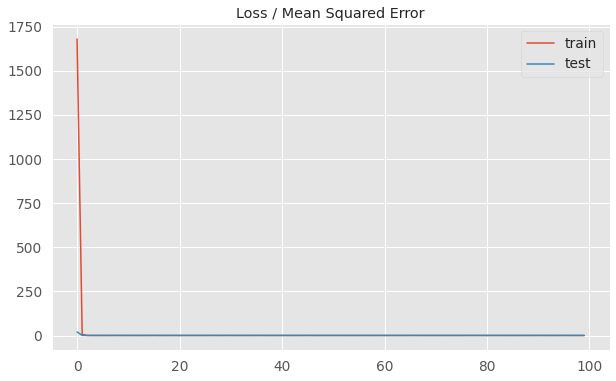

In [242]:
# mlp with scaled outputs on the regression problem
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
#X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X_train,X_test
trainy, testy = y_train,y_test
#trainy = np.array(y_train)
#testy = np.array(y_test)
# reshape 1d arrays to 2d arrays
#trainy = trainy #.reshape(len(trainy), 1)
#testy = testy #.reshape(len(testy), 1)
# created scaler
scaler = StandardScaler()
# fit scaler on training dataset
#scaler.fit(trainy)
# transform training dataset
#trainy = scaler.transform(trainy)
# transform test dataset
#testy = scaler.transform(testy)
# define model
model = Sequential()
model.add(Dense(5, input_dim=8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(12, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
# compile model
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.001, momentum=0.9))
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % ((train_mse), (test_mse)))
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [236]:
y_pred = model.predict(test_x)

In [238]:
y_pred = np.exp(y_pred)

In [239]:
y_pred

array([[166543.88],
       [166543.88],
       [166543.88],
       ...,
       [166543.88],
       [166543.88],
       [166543.88]], dtype=float32)

In [240]:
pred_y = y_pred.reshape(-1)
all_id = np.array(test_dataY['Id'])
y_pred = pd.DataFrame(list(zip(all_id, pred_y)),columns =['Id', 'SalePrice'])
y_pred.to_csv("/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/ann.log.csv", index=False)

Skew is: 1.8828757597682129


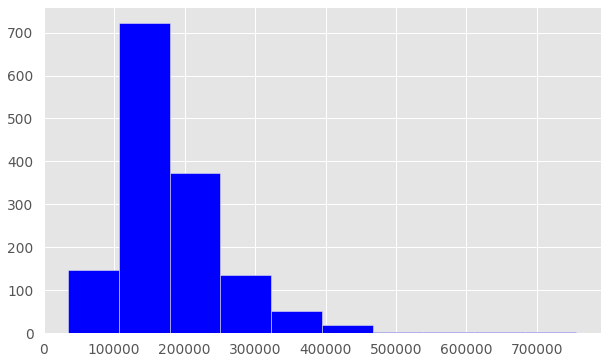

In [192]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
print ("Skew is:", train_x.SalePrice.skew())
plt.hist(train_x.SalePrice, color='blue')
plt.show()

Skew is: 0.12133506220520406


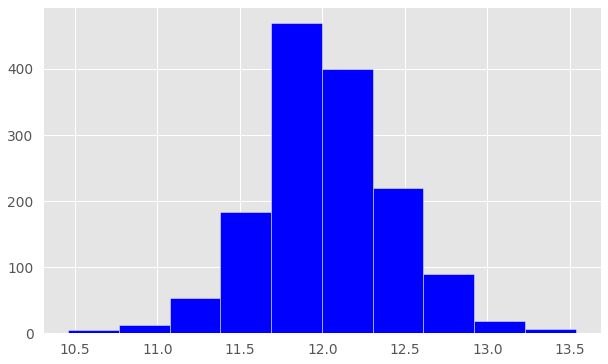

In [194]:
target = np.log(train_x.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

In [195]:
corr = train_x.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice       1.000000
OverallQual     0.790982
TotRmsAbvGrd    0.713417
GarageArea1     0.680058
TotalBsmtSF     0.613581
Name: SalePrice, dtype: float64 

FullBath      5.606638e-01
YearBuilt     5.492957e-01
MasVnrArea    4.726145e-01
Fireplaces    4.669288e-01
Zscore       -3.961248e-16
Name: SalePrice, dtype: float64


In [196]:
quality_pivot = train_x.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)

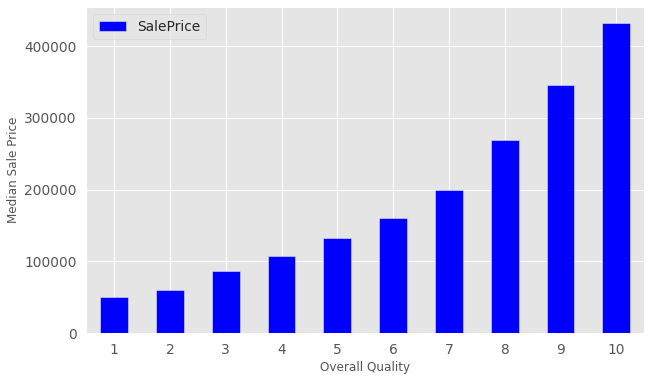

In [198]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [202]:
train_x.columns

Index(['SalePrice', 'OverallQual', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd',
       'YearBuilt', 'MasVnrArea', 'Fireplaces', 'GarageArea1', 'Zscore'],
      dtype='object')

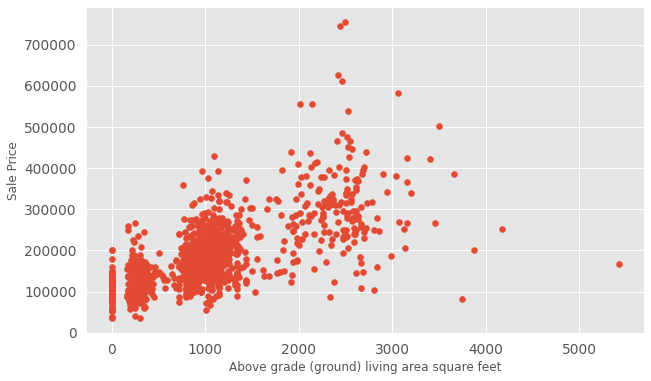

In [204]:
plt.scatter(x=train_x['GarageArea1'], y=train_x['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

In [189]:
df_visits = exp(train_x['OverallQual'])
# power transform
df_visits = boxcox(df_visits, -2)

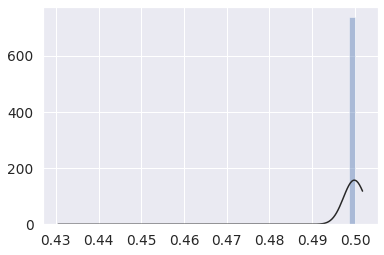

In [190]:
#sns.distplot(train_x['OverallQual'],(train_x['SalePrice'])

from scipy.stats import norm
ax = sns.distplot(df_visits, fit=norm, kde=False)

In [156]:
train_x

SalePrice  OverallQual  TotalBsmtSF  ...  MasVnrArea  Fireplaces  GarageArea1
0        208500            7          856  ...       196.0           0         1096
1        181500            6         1262  ...         0.0           1          920
2        223500            7          920  ...       162.0           1         1216
3        140000            7          756  ...         0.0           1         1926
4        250000            8         1145  ...       350.0           1         2508
...         ...          ...          ...  ...         ...         ...          ...
1455     175000            6          953  ...         0.0           1          920
1456     210000            6         1542  ...       119.0           2         1000
1457     266500            7         1152  ...         0.0           2          252
1458     142125            5         1078  ...         0.0           0          240
1459     147500            5         1256  ...         0.0           0          276

[1460 rows x 9 columns]

In [164]:
train_x.skew(axis = 1, skipna = False) 

0       2.995035
1       2.994098
2       2.995612
3       2.989063
4       2.996099
          ...   
1455    2.992961
1456    2.994712
1457    2.996313
1458    2.990460
1459    2.990909
Length: 1460, dtype: float64

In [167]:
df_visits = train_x['OverallQual'].apply(lambda x: np.log(x))

In [141]:
train_x['YearBuilt'] = (train_x['YearBuilt'] + train_data['GarageYrBlt'] + train_x['YearRemodAdd'])
train_x = train_x.drop(['GarageYrBlt','YearRemodAdd'],axis = 1)

In [139]:
t1 = (train_x['YearBuilt'] + train_data['GarageYrBlt'] + train_x['YearRemodAdd'])/3

In [140]:
print(t1.corr(train_x['SalePrice']))

0.5055864228612325


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(X, y)
tree.feature_importances_
# array([ 0.51390759,  0.48609241])